In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import cv2

In [2]:
rgbs = np.load("data/pick_cube_rgbs.npy")
rgbs_0 = rgbs[0]
rgbs_1 = rgbs[1]
segs = np.load("data/pick_cube_segs.npy")
segs = segs[:, :, :, :-1]

In [3]:
# ground is 12 or 14
segs[segs==14] = 0
segs[segs==12] = 0
# cube is 13 and 15
# segs[segs == 13] = 0
# segs[segs == 15] = 0
segs[segs > 0] = 1
segs[segs > 0] = 1

# segs_0 = segs[0] / segs[0].max()
# segs_1 = segs[1] / segs[1].max()

segs_0 = np.any(segs[0] > 0, axis=-1).astype(np.uint8)
segs_1 = np.any(segs[1] > 0, axis=-1).astype(np.uint8)
segs_0 = np.repeat(segs_0[:, :, np.newaxis], 3, axis=2) * 255
segs_1 = np.repeat(segs_1[:, :, np.newaxis], 3, axis=2) * 255


# bounding box
def get_bbox(mask):
    mask = mask > 0
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

# segs_0 = np.zeros_like(segs_0)
# segs_0[get_bbox(segs[0])[0]:get_bbox(segs[0])[1], get_bbox(segs[0])[2]:get_bbox(segs[0])[3]] = 255
# segs_1 = np.zeros_like(segs_1)
# segs_1[get_bbox(segs[1])[0]:get_bbox(segs[1])[1], get_bbox(segs[1])[2]:get_bbox(segs[1])[3]] = 255

kernel = np.ones((5, 5), np.uint8)
segs_0 = cv2.dilate(segs_0, kernel, iterations=5)
segs_0 = cv2.GaussianBlur(segs_0, (15, 15), 200)
segs_1 = cv2.dilate(segs_1, kernel, iterations=5)
segs_1 = cv2.GaussianBlur(segs_1, (15, 15), 200)

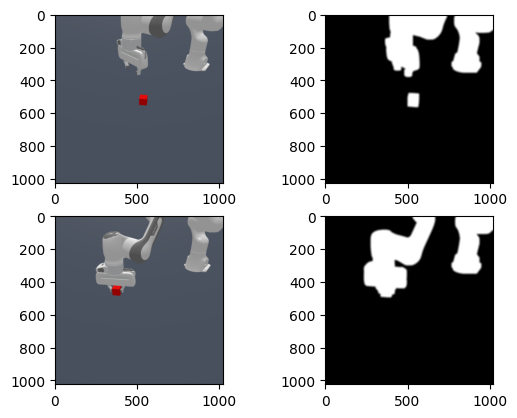

In [4]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(rgbs_0)
axs[0, 1].imshow(segs_0 / 255)
axs[1, 0].imshow(rgbs_1)
axs[1, 1].imshow(segs_1 / 255)
plt.show()

In [5]:
rgb_0 = Image.fromarray(rgbs_0).resize((512, 512))
seg_0 = Image.fromarray(((1-segs_0/255)*255).astype(np.uint8)).resize((512, 512))
rgb_1 = Image.fromarray(rgbs_1).resize((512, 512))
seg_1 = Image.fromarray(segs_1).resize((512, 512))

In [12]:
from diffusers import StableDiffusionInpaintPipeline
import torch


pipe = StableDiffusionInpaintPipeline.from_pretrained(
    # "runwayml/stable-diffusion-inpainting",
    "stabilityai/stable-diffusion-2-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe.safety_checker = lambda images, clip_input: (images, False)
pipe = pipe.to(device)

/home/mkim/miniconda3/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 177032.31it/s]
/home/mkim/miniconda3/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [5]:
rgb_0 = np.load("test_data/rgb_1.npy")
seg_0 = np.load("test_data/segmentation_1.npy")[:, :, :3]

# gray scale
# seg_0 = np.mean(seg_0, axis=-1, keepdims=False)
print(seg_0.shape)

(512, 512, 3)


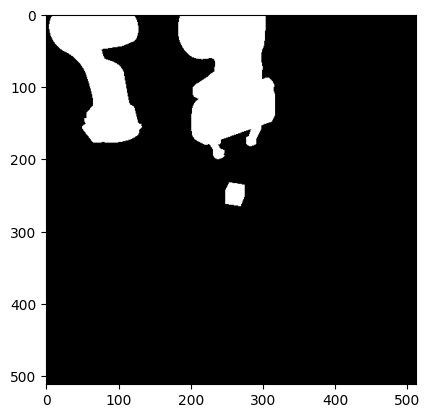

In [6]:
seg = seg_0.copy()
seg[seg==14] = 0
seg[seg==16] = 0
# seg[seg > 0] = 1
# seg[seg > 0] = 1

seg = np.any(seg > 0, axis=-1).astype(np.uint8)
seg = np.repeat(seg[:, :, np.newaxis], 3, axis=2)
plt.imshow(seg/seg.max())

In [29]:
rgb_0 = np.load("test_data/rgb_1.npy")
seg_0 = np.load("test_data/segmentation_1.npy")[:, :, :3]
seg_0 = np.mean(seg_0, axis=-1, keepdims=False)

print(seg_0.shape)

# ground is 12 or 14
seg_0[seg_0==14] = 0
seg_0[seg_0==12] = 0
# cube is 13 and 15
# segs[segs == 13] = 0
# segs[segs == 15] = 0
seg_0[seg_0 > 0] = 1
seg_0[seg_0 > 0] = 1

# segs_0 = segs[0] / segs[0].max()
# segs_1 = segs[1] / segs[1].max()

segs_0 = np.any(seg_0 > 0, axis=-1).astype(np.uint8)
segs_0 = np.repeat(seg_0[:, :, np.newaxis], 3, axis=2)


# bounding box
def get_bbox(mask):
    mask = mask > 0
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

# segs_0 = np.zeros_like(segs_0)
# segs_0[get_bbox(segs[0])[0]:get_bbox(segs[0])[1], get_bbox(segs[0])[2]:get_bbox(segs[0])[3]] = 255
# segs_1 = np.zeros_like(segs_1)
# segs_1[get_bbox(segs[1])[0]:get_bbox(segs[1])[1], get_bbox(segs[1])[2]:get_bbox(segs[1])[3]] = 255

kernel = np.ones((5, 5), np.uint8)
segs_0 = cv2.dilate(segs_0, kernel, iterations=5)
segs_0 = cv2.GaussianBlur(segs_0, (15, 15), 200)

(512, 512)


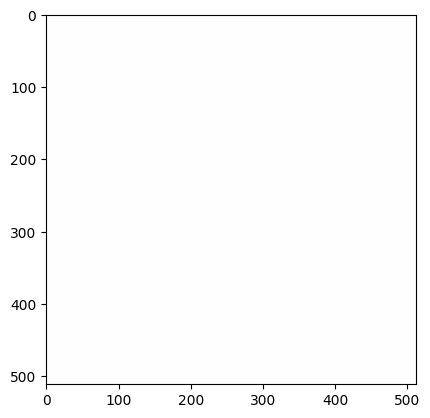

In [31]:
plt.imshow(segs_0)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:10<00:00,  9.30it/s]


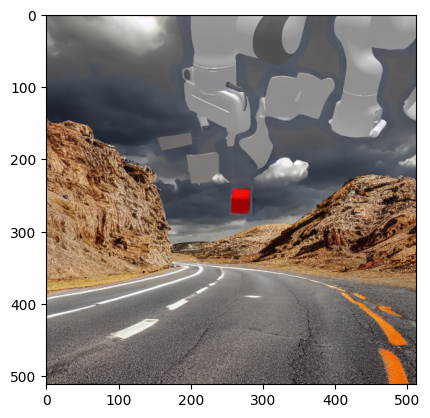

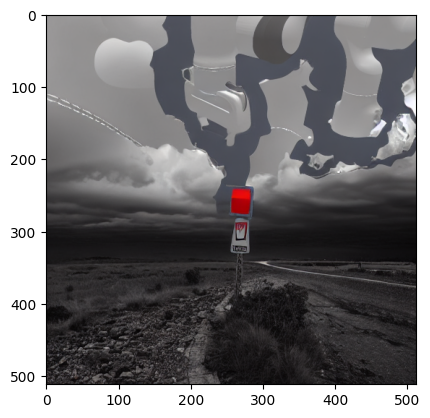

In [9]:
# prompt = "dog, high resolution in a simple grey background"
prompt = "grassy grey farmland area, looking down"
prompt = "Aerial perspective of a rural setting, where fields of grey intermingle with green patches"



#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
images = pipe(prompt=prompts[-1], image=rgb_0, mask_image=seg_0, num_inference_steps=100, num_images_per_prompt=2).images

for image in images:
    plt.imshow(image)
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:32<00:00,  3.07it/s]


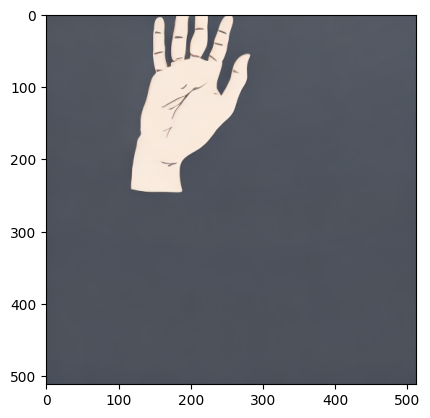

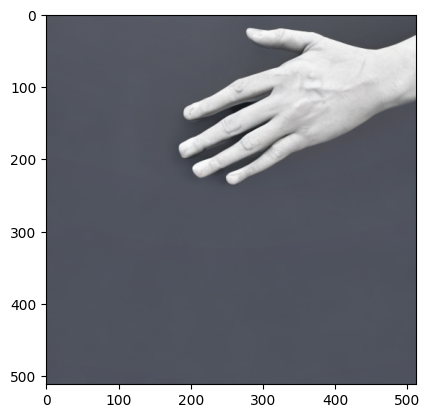

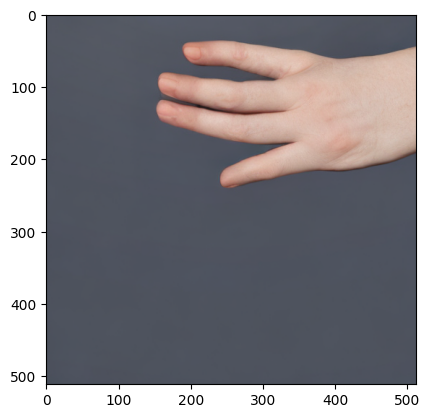

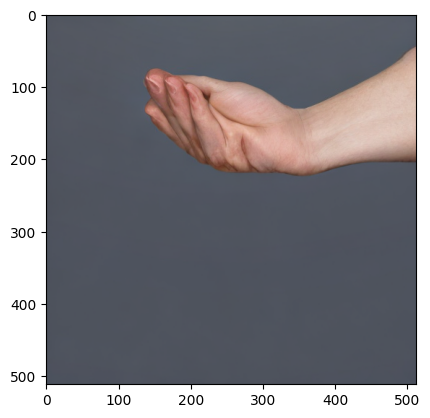

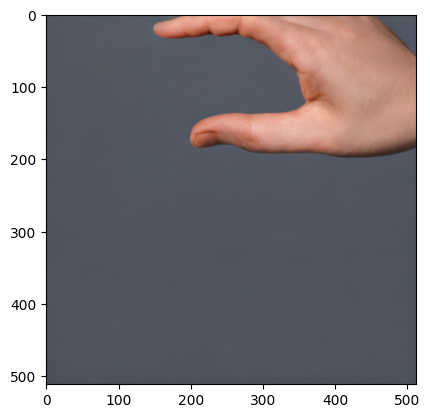

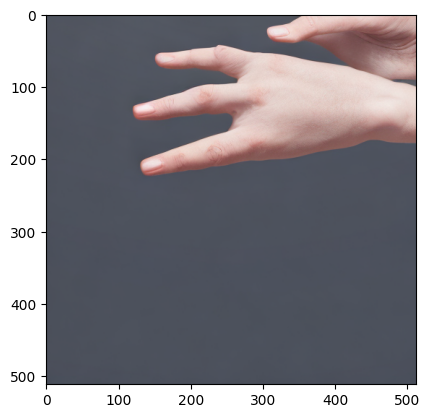

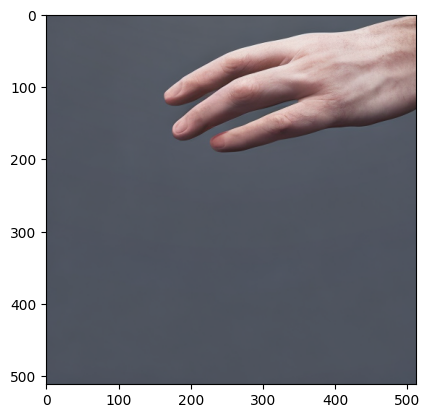

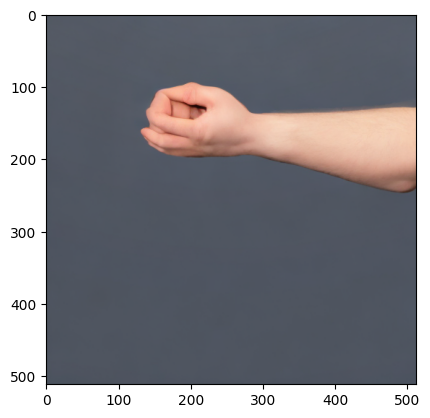

In [12]:
# prompt = "dog, high resolution in a simple grey background"
prompt = "human hand, simple grey background"

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
images = pipe(prompt=prompt, image=rgb_1, mask_image=seg_1, num_inference_steps=100, num_images_per_prompt=8).images

for image in images:
    plt.imshow(image)
    plt.show()

  2%|▏         | 2/100 [00:01<00:46,  2.13it/s]

100%|██████████| 100/100 [00:32<00:00,  3.07it/s]


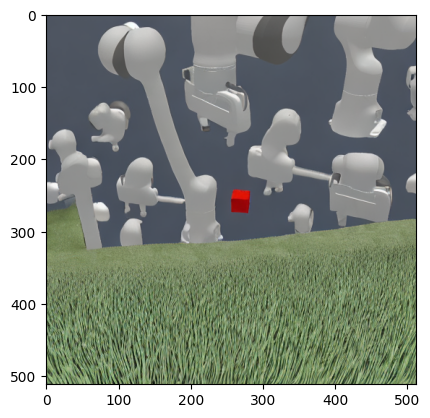

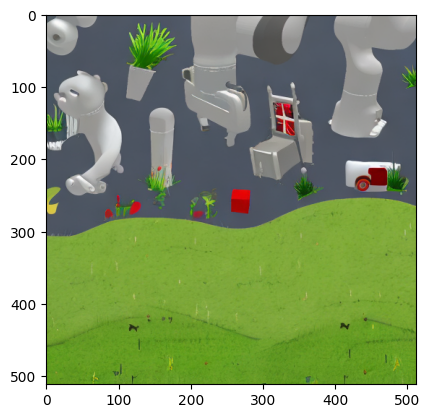

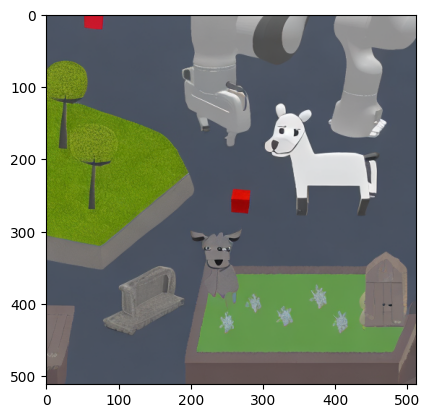

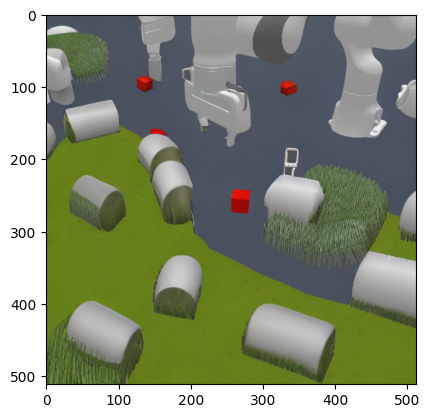

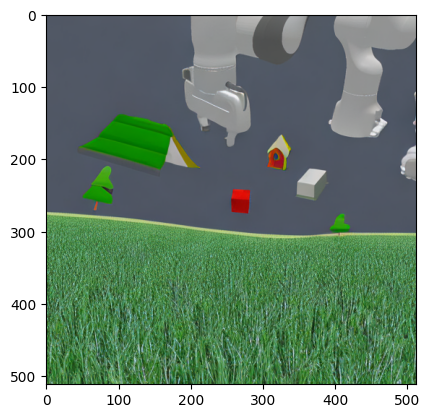

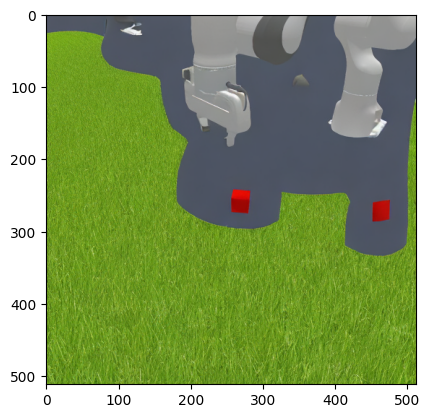

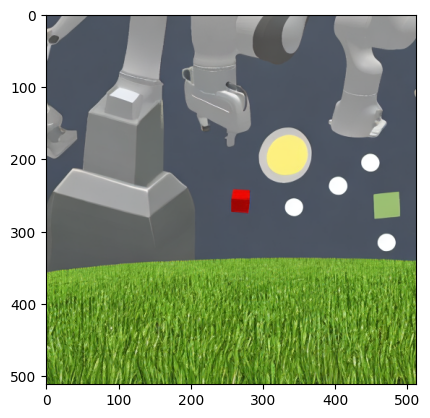

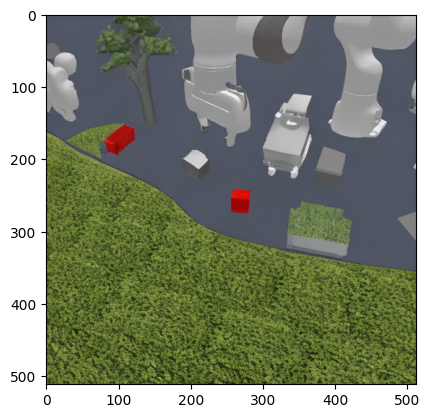

In [133]:
# prompt = "dog, high resolution in a simple grey background"
prompt = "grassy grey farmland area"

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
images = pipe(prompt=prompt, image=rgb_0, mask_image=seg_0, num_inference_steps=100, num_images_per_prompt=8).images

for image in images:
    plt.imshow(image)
    plt.show()